# Advanced pandas Practice - Nashville City Cemetery

In this exercise, you'll get to explore some additional features of the pandas library for cleaning and summarizing data. This will be done using the Nashville City Cemetery data.

As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

3. Create a line chart showing the number of burials per year.

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?

7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c_df= pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

c_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"


2. Most Common Causes of Death.
a. Find the 10 most common (known) recorded causes of death.
b. Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [2]:
c_df=c_df.rename(columns={'Cause of Death/Burial':"COD"})
c_df['COD'] = c_df['COD'].str.lower()
cleaned_df=c_df.loc[~c_df['COD'].isin(['unknown','not known'])]
cleaned_df
cleaned_df['COD']=cleaned_df['COD'].replace(['cholera','stil born','complicated','measels','teethin','feever','dropsey','hooping cough'],
                                            ['cholrea','still born','complication','measles','teething','fever','dropsy','whooping cough'])
top10_cod=cleaned_df.COD.value_counts().sort_values(ascending=False).head(10)

C:\Users\joyce\AppData\Local\Temp\ipykernel_76676\2051288128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['COD']=cleaned_df['COD'].replace(['cholera','stil born','complicated','measels','teethin','feever','dropsey','hooping cough'],


c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

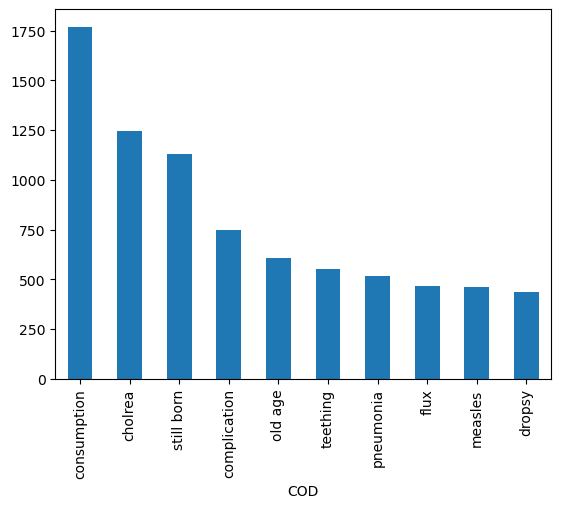

In [3]:
ax=top10_cod.plot.bar()

3. Create a line chart showing the number of burials per year.

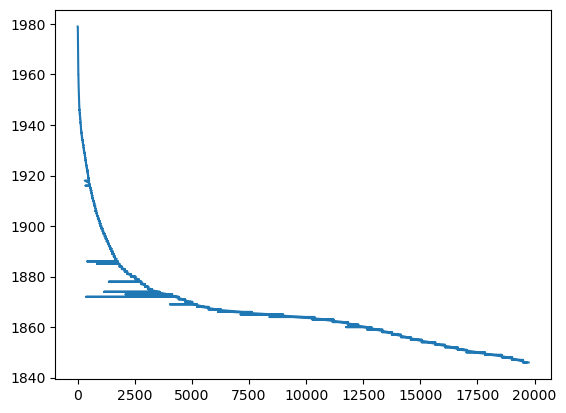

In [4]:

year=cleaned_df['Burial Year'].sort_values(ascending=False)
ax=plt.plot(year)

4. Burials per Month and Year
a. Use the crosstab function to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.

In [5]:
pd.crosstab(cleaned_df['Burial Year'],cleaned_df['Month No.'],margins=True)

Month No.,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,All
Burial Year,,,,,,,,,,,,,
1846.0,15,20,18,19,21,0,0,0,33,29,18,22,195
1847.0,34,21,28,24,21,40,31,43,31,42,27,30,372
1848.0,25,29,36,24,35,42,53,32,18,17,16,24,351
1849.0,37,61,54,38,56,225,87,29,20,15,17,26,665
1850.0,18,22,36,23,30,111,321,44,17,21,23,22,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974.0,0,0,0,0,0,0,0,0,0,0,1,0,1
1977.0,0,0,1,0,1,0,0,0,0,0,1,0,3
1978.0,0,0,0,0,0,0,0,2,0,0,0,0,2
